# Multimodal tests

## Load libraries

In [7]:
import sys
sys.path.append('../')

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from src.sigmoid_activation import SigmoidActivation
from src.softmax_activation import SoftmaxActivation
from src.linear_activation import LinearActivation
from src.relu_activation import ReLUActivation
from src.network import Network
from src.log_error import LogError
from src.mean_squared_error import MeanSquaredError
from src.mean_absolute_error import MeanAbsoluteError
from src.relu_activation import ReLUActivation
from src import utils
from src import VisualizeNN as VisNN

In [11]:
sizes = ['100', '500', '1000', '10000']
datasets_multimodal = [('data.multimodal.train.' + size + '.csv', 
                    'data.multimodal.test.' + size + '.csv') for size in sizes]
datasets_multimodal

[('data.multimodal.train.100.csv', 'data.multimodal.test.100.csv'),
 ('data.multimodal.train.500.csv', 'data.multimodal.test.500.csv'),
 ('data.multimodal.train.1000.csv', 'data.multimodal.test.1000.csv'),
 ('data.multimodal.train.10000.csv', 'data.multimodal.test.10000.csv')]

In [12]:
dataframes_multimodal = [(pd.read_csv('../data_test/Regression/'+name[0]), 
                      pd.read_csv('../data_test/Regression/'+name[1])) for name in datasets_multimodal]


In [13]:
train_df, test_df =  dataframes_multimodal[2]
train_df.describe()

,x,y
count,1000.000000,1000.000000
mean,1.594882,-200.130178
std,2.023918,98.765982
min,-1.990797,-377.712581
25%,-0.137108,-270.027338
50%,1.525980,-210.262466
75%,3.379829,-128.649578
max,4.991945,22.093923


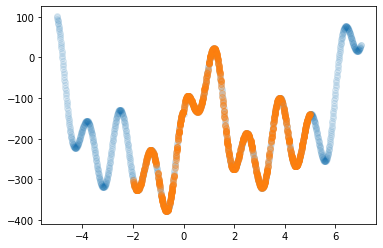

In [17]:
train_df, test_df =  dataframes_multimodal[2]
plt.scatter(test_df['x'], test_df['y'], alpha=.1)
plt.scatter(train_df['x'], train_df['y'], alpha=.3)
plt.show()

## 1000 element dataset data normalization

In [19]:
normalization_scales = []
normalized_multimodal = []
for train_df, test_df in dataframes_multimodal:
    df_min, df_max = utils.get_normalisation_scale(train_df, True)
    normalization_scales.append((df_min, df_max))
    train_df = utils.normalized_dataset(train_df, df_min, df_max, True)
    test_df = utils.normalized_dataset(test_df, df_min, df_max, True)
    normalized_multimodal.append((train_df, test_df))

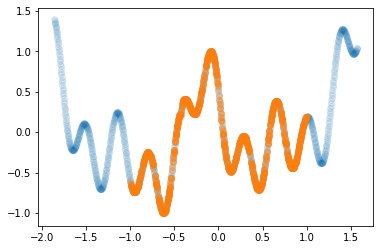

In [20]:
train_df, test_df = normalized_multimodal[2]
train_df.head()
plt.scatter(test_df['x'], test_df['y'], alpha=.1)
plt.scatter(train_df['x'], train_df['y'], alpha=.3)
plt.show()

### Network training - 3 layer ReLU

In [24]:
input_size, output_size = 1, 1
random_seed = 1234

In [27]:
train_df, test_df = normalized_multimodal[2]

layers = [(8, ReLUActivation(), True),
          (8, ReLUActivation(), True),
          (8, ReLUActivation(), True),
          (output_size, LinearActivation(), True)]


batch_size = 10
learning_rates = [0.001, 0.005, 0.01, 0.025, 0.05, 0.1]
epochs = 500
train_losses = []
validation_losses = []

for lr in learning_rates:
    network = Network(input_size, layers, MeanSquaredError(), random_seed)
    train_loss, validation_loss = utils.train_regression(network, 
                                                         train_df,
                                                         epochs,
                                                         lr,
                                                         batch_size=batch_size)
    train_losses.append(train_loss)
    validation_losses.append(validation_loss)

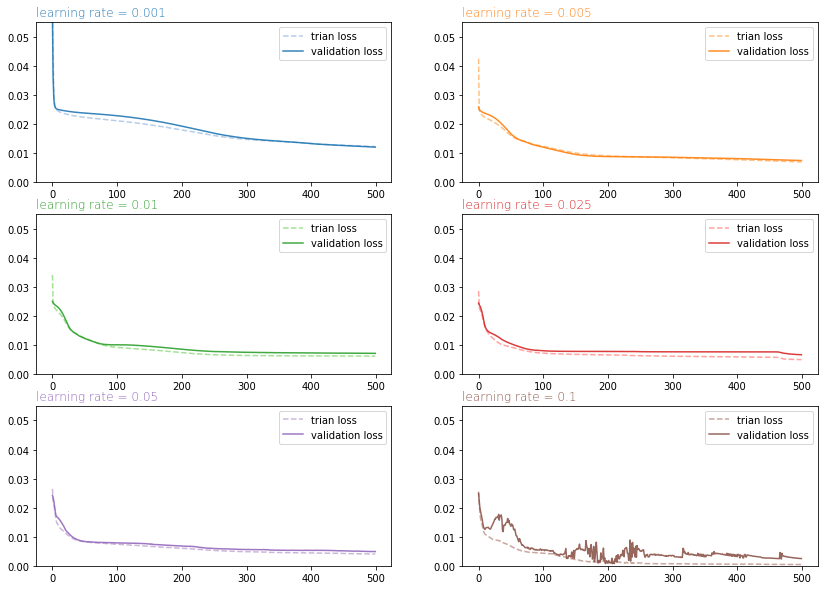

In [28]:
palette = plt.get_cmap('tab20')
fig = plt.figure(figsize=(14, 10))
for i in range(len(learning_rates)):
    ax = fig.add_subplot(3, 2, i+1)
    ax.set_ylim(0.0, 0.055)
    plt.plot(train_losses[i], color=palette(1+2*i), linestyle='dashed', alpha=0.9, label='trian loss')
    plt.plot(validation_losses[i], color=palette(2*i), alpha=0.9, label='validation loss')
    plt.legend()
    plt.title('learning rate = ' + str(learning_rates[i]), loc='left', fontsize=12, fontweight=0, color=palette(2*i))

plt.show()

In [30]:
train_df, test_df = normalized_multimodal[2]

layers = [(8, ReLUActivation(), True),
          (8, ReLUActivation(), True),
          (8, ReLUActivation(), True),
          (output_size, LinearActivation(), True)]


batch_size = 10
learning_rates = [0.02, 0.05, 0.06, 0.08]
epochs = 2500
train_losses = []
validation_losses = []

for lr in learning_rates:
    network = Network(input_size, layers, MeanSquaredError(), random_seed)
    train_loss, validation_loss = utils.train_regression(network, 
                                                         train_df,
                                                         epochs,
                                                         lr,
                                                         batch_size=batch_size)
    train_losses.append(train_loss)
    validation_losses.append(validation_loss)

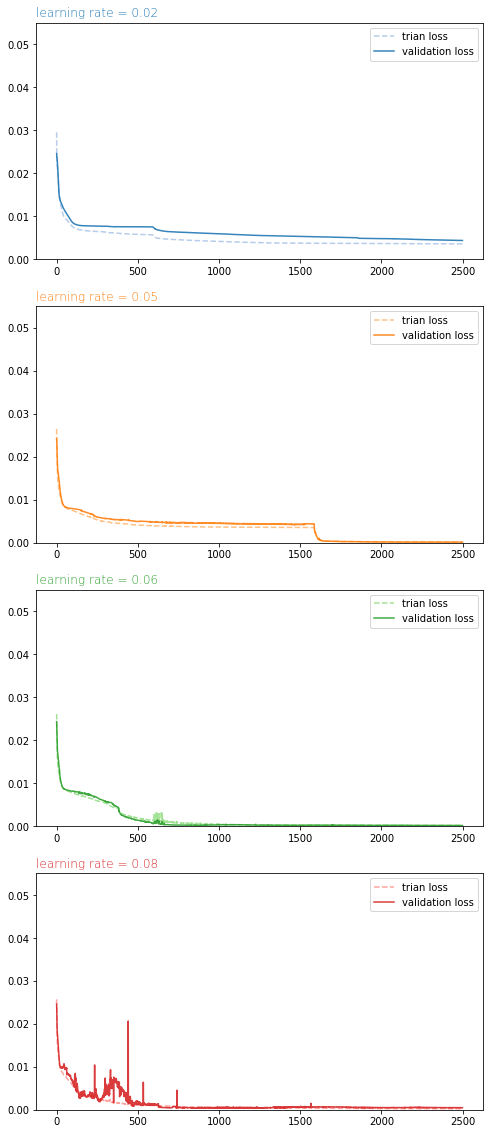

In [31]:
palette = plt.get_cmap('tab20')
fig = plt.figure(figsize=(8, 20))
for i in range(len(learning_rates)):
    ax = fig.add_subplot(4, 1, i+1)
    ax.set_ylim(0.0, 0.055)
    plt.plot(train_losses[i], color=palette(1+2*i), linestyle='dashed', alpha=0.9, label='trian loss')
    plt.plot(validation_losses[i], color=palette(2*i), alpha=0.9, label='validation loss')
    plt.legend()
    plt.title('learning rate = ' + str(learning_rates[i]), loc='left', fontsize=12, fontweight=0, color=palette(2*i))
plt.show()

In [33]:
for losses in validation_losses:
    print(min(losses), losses.index(min(losses)))

0.00429567259565289 2498
0.00010249770797573819 2495
0.0001503629437985287 2497
0.00035240961313884295 1033


In [32]:
import os
duration = 4  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

0

In [36]:
layers = [(8, ReLUActivation(), True),
          (8, ReLUActivation(), True),
          (8, ReLUActivation(), True),
          (output_size, LinearActivation(), True)]

N = 5
epochs = 1000
learning_rate = 0.06
batch_size=10

train_df, test_df = normalized_multimodal[2]
networks = []
train_losses = []
validation_losses = []
acc = np.zeros((N,1))
for i in range(N):
    network = Network(input_size, layers, MeanSquaredError(), np.random.randint(0,1000))
    train_loss, validation_loss = utils.train_regression(network, 
                                                         train_df, 
                                                         epochs, 
                                                         learning_rate,
                                                         batch_size=batch_size)
    networks.append(network)
    validation_losses.append(validation_loss)
    train_losses.append(train_loss)
    acc[i] = utils.calculate_mse(network, test_df)
print(acc.mean(axis=0), acc.std(axis=0))

[1.14895017] [0.30514125]


In [38]:
acc

array([[1.42786357],
       [1.45722983],
       [0.93089713],
       [1.26190964],
       [0.66685068]])

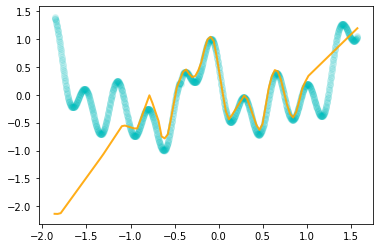

In [39]:
utils.plot_regression(networks[4], test_df)

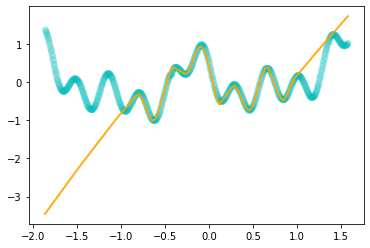

In [40]:
utils.plot_regression(networks[1], test_df)

(2, 9)
(9, 9)
(9, 9)
(9, 2)
[(2, 9), (9, 9), (9, 9), (9, 2)] [2, 9, 9, 9, 1]


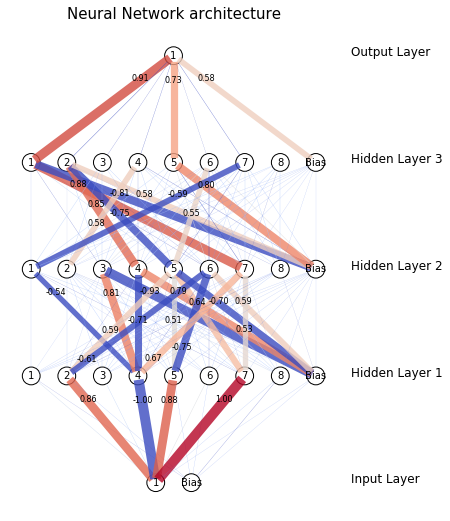

In [44]:
utils.draw_weights(networks[1])

In [37]:
import os
duration = 4  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

0

## Simple network

In [45]:
train_df, test_df = normalized_multimodal[2]

layers = [(8, ReLUActivation(), True),
          (output_size, LinearActivation(), True)]


batch_size = 10
learning_rates = [0.001, 0.005, 0.01, 0.025, 0.05, 0.1]
epochs = 500
train_losses = []
validation_losses = []

for lr in learning_rates:
    network = Network(input_size, layers, MeanSquaredError(), random_seed)
    train_loss, validation_loss = utils.train_regression(network, 
                                                         train_df,
                                                         epochs,
                                                         lr,
                                                         batch_size=batch_size)
    train_losses.append(train_loss)
    validation_losses.append(validation_loss)

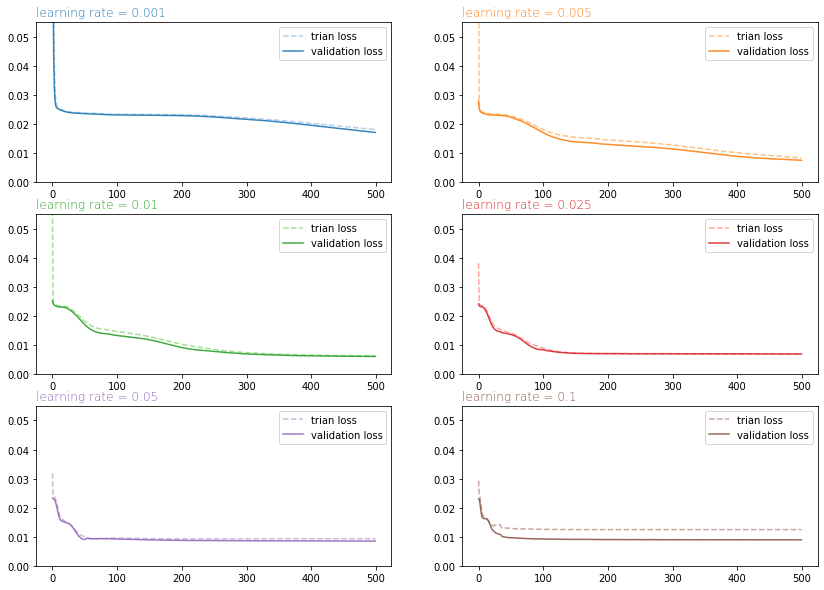

In [46]:
palette = plt.get_cmap('tab20')
fig = plt.figure(figsize=(14, 10))
for i in range(len(learning_rates)):
    ax = fig.add_subplot(3, 2, i+1)
    ax.set_ylim(0.0, 0.055)
    plt.plot(train_losses[i], color=palette(1+2*i), linestyle='dashed', alpha=0.9, label='trian loss')
    plt.plot(validation_losses[i], color=palette(2*i), alpha=0.9, label='validation loss')
    plt.legend()
    plt.title('learning rate = ' + str(learning_rates[i]), loc='left', fontsize=12, fontweight=0, color=palette(2*i))

plt.show()

In [47]:
layers = [(8, ReLUActivation(), True),
          (output_size, LinearActivation(), True)]

N = 5
epochs = 400
learning_rate = 0.1
batch_size=10

train_df, test_df = normalized_multimodal[2]
networks = []
train_losses = []
validation_losses = []
acc = np.zeros((N,1))
for i in range(N):
    network = Network(input_size, layers, MeanSquaredError(), np.random.randint(0,1000))
    train_loss, validation_loss = utils.train_regression(network, 
                                                         train_df, 
                                                         epochs, 
                                                         learning_rate,
                                                         batch_size=batch_size)
    networks.append(network)
    validation_losses.append(validation_loss)
    train_losses.append(train_loss)
    acc[i] = utils.calculate_mse(network, test_df)
print(acc.mean(axis=0), acc.std(axis=0))

[0.73424273] [0.34935491]


In [48]:
acc

array([[0.91807898],
       [0.46996887],
       [0.18410621],
       [1.10025339],
       [0.99880621]])

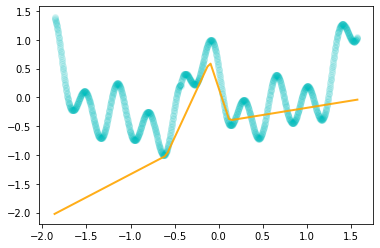

In [51]:
utils.plot_regression(networks[4], test_df)